In [1]:
# Required python packages:
import sqlite3
import pandas as pd
import re
import numpy as np
import seaborn as sns
import math

In [2]:
# Importing dataset:
df = pd.read_csv("indeedjobs2022.csv")

In [3]:
# Prevewing the values in each feature:
df.apply(lambda col: col.unique())

# Row count
print(len(df))

1235


In [4]:
#  Selecting features with missing values 
NA = [(c, df[c].isna().mean()*100) for c in df]
NA = pd.DataFrame(NA, columns=["column_name", "percentage"])

# Display the percentage of missing values in each feature
NA = NA[NA.percentage > 0]
NA.sort_values("percentage", ascending=False)

,column_name,percentage
8,Salary,80.728745
10,Remote,78.218623
9,JobType,34.898785
11,Reviews,23.805668
12,Stars,23.805668
2,Location,5.425101
1,Company,1.295547
4,CompanyLink,1.295547
0,Title,0.485830
7,Description,0.485830


In [5]:
df = df.drop_duplicates(subset=['Description'], keep='last')

In [6]:
# Row count
print(len(df))

# Prevewing the values in each feature
print(df.apply(lambda col: col.unique()))

679
Title          [Master Data Analyst, Business Intelligence An...
Company        [Robert Half, Vault Credit Corporation, Adecco...
Location       [Calgary, AB, Montréal, QC, Ottawa, ON, Delta,...
JobLink        [https://ca.indeed.com/pagead/clk?mo=r&ad=-6NY...
CompanyLink    [https://ca.indeed.com/cmp/Robert-Half?campaig...
DatePosted     [2022-06-16, 2022-06-22, 2022-06-14, 2022-06-1...
ExtractDate                 [2022-06-22, 2022-06-23, 2022-06-25]
Description    [Our fast paced client in Calgary is currently...
Salary         [nan, $65,000–$75,000 a year, $90,000–$115,000...
JobType        [Temporary, Fixed term contract, nan, Fixed te...
Remote          [nan, Remote, Hybrid remote, Temporarily remote]
Reviews        [12,757 reviews, 2 reviews, 18,938 reviews, na...
Stars          [3.9, 3.5, 3.8, nan, 3.7, 4.1, 3.6, 3.2, 3.4, ...
dtype: object


In [7]:
#  Selecting features with missing values 
NA = [(c, df[c].isna().mean()*100) for c in df]
NA = pd.DataFrame(NA, columns=["column_name", "percentage"])

# Display the percentage of missing values in each feature 
NA = NA[NA.percentage > 0]
NA.sort_values("percentage", ascending=False)

,column_name,percentage
8,Salary,78.203240
10,Remote,76.730486
9,JobType,35.640648
11,Reviews,24.742268
12,Stars,24.742268
2,Location,4.565538
1,Company,1.178203
4,CompanyLink,1.178203
0,Title,0.147275
7,Description,0.147275


In [8]:
#df.Description.str.lower().head(8)  # Convert all comments to lowercase

In [9]:
dfl = df.Description.str.lower()
python = dfl.str.contains("python")
powerbi = dfl.str.contains("power bi")
tableau = dfl.str.contains("tableau")
qliksense = dfl.str.contains("qlik sense")
looker = dfl.str.contains("looker")
klipfolio = dfl.str.contains("klipfolio")
domo = dfl.str.contains("domo")

df['python'] = python
df['powerbi'] = powerbi
df['tableau'] = tableau
df['qliksense'] = qliksense
df['looker'] = looker
df['klipfolio'] = klipfolio
df['domo'] = domo

In [10]:
python = round(((np.count_nonzero(python))/(df.Description.count())*100), 3)
powerbi = round(((np.count_nonzero(powerbi))/(df.Description.count())*100), 3)
tableau = round(((np.count_nonzero(tableau))/(df.Description.count())*100), 3)
qliksense = round(((np.count_nonzero(qliksense))/(df.Description.count())*100), 3)
looker = round(((np.count_nonzero(looker))/(df.Description.count())*100), 3)
klipfolio = round(((np.count_nonzero(klipfolio))/(df.Description.count())*100), 3)
domo = round(((np.count_nonzero(domo))/(df.Description.count())*100), 3)

In [11]:
df1 = pd.DataFrame({"Name":['python', 'powerbi', 'tableau', 'qliksense', 'looker', 'klipfolio', 'domo'],
                   "Percentage":[python, powerbi, tableau, qliksense, looker, klipfolio, domo]})

In [12]:
df1.sort_values("Percentage", ascending=False)

,Name,Percentage
0,python,20.944
2,tableau,19.469
1,powerbi,17.109
4,looker,3.245
6,domo,1.327
3,qliksense,0.590
5,klipfolio,0.147


In [13]:
dft = df.Title.str.lower()
data_analyst = dfl.str.contains("data analyst")
business_intelligence = dfl.str.contains("business intelligence")
senior_analyst = dfl.str.contains("senior analyst")
business_analyst = dfl.str.contains("business analyst")
payroll_analyst = dfl.str.contains("payroll analyst")
security_analyst = dfl.str.contains("security analyst")
analyst = dfl.str.contains("analyst")

df['data_analyst'] = data_analyst
df['business_intelligence'] = business_intelligence
df['senior_analyst'] = senior_analyst
df['business_analyst'] = business_analyst
df['payroll_analyst'] = payroll_analyst
df['security_analyst'] = security_analyst
df['analyst'] = analyst

In [14]:
data_analyst = round(((np.count_nonzero(data_analyst))/(df.Description.count())*100), 3)
business_intelligence = round(((np.count_nonzero(business_intelligence))/(df.Description.count())*100), 3)
senior_analyst = round(((np.count_nonzero(senior_analyst))/(df.Description.count())*100), 3)
business_analyst = round(((np.count_nonzero(business_analyst))/(df.Description.count())*100), 3)
payroll_analyst = round(((np.count_nonzero(payroll_analyst))/(df.Description.count())*100), 3)
security_analyst = round(((np.count_nonzero(security_analyst))/(df.Description.count())*100), 3)
analyst = round(((np.count_nonzero(analyst))/(df.Description.count())*100), 3)

In [15]:
df2 = pd.DataFrame({"Name":['data_analyst', 'business_intelligence', 'senior_analyst', 'business_analyst', 'payroll_analyst', 'security_analyst', 'analyst'],
                   "Percentage":[data_analyst, business_intelligence, senior_analyst, business_analyst, payroll_analyst, security_analyst, analyst]})

In [16]:
df2.sort_values("Percentage", ascending=False)

,Name,Percentage
6,analyst,83.923
3,business_analyst,23.599
0,data_analyst,21.091
1,business_intelligence,19.912
2,senior_analyst,4.130
5,security_analyst,0.737
4,payroll_analyst,0.295


In [17]:
dft = df.Location.str.lower()
AB = dfl.str.contains(", ab")
BC = dfl.str.contains(", bc")
ON = dfl.str.contains(", on")
NS = dfl.str.contains(", ns")
QC = dfl.str.contains(", qc")
SK = dfl.str.contains(", sk")
NB = dfl.str.contains(", nb")

df['AB'] = data_analyst
df['BC'] = business_intelligence
df['ON'] = senior_analyst
df['NS'] = business_analyst
df['QC'] = payroll_analyst
df['SK'] = security_analyst
df['NB'] = analyst

In [18]:
AB = round(((np.count_nonzero(AB))/(df.Description.count())*100), 3)
BC = round(((np.count_nonzero(BC))/(df.Description.count())*100), 3)
ON = round(((np.count_nonzero(ON))/(df.Description.count())*100), 3)
NS = round(((np.count_nonzero(NS))/(df.Description.count())*100), 3)
QC = round(((np.count_nonzero(QC))/(df.Description.count())*100), 3)
SK = round(((np.count_nonzero(SK))/(df.Description.count())*100), 3)
NB = round(((np.count_nonzero(NB))/(df.Description.count())*100), 3)

In [25]:
df2 = pd.DataFrame({"Name":['AB', 'BC', 'ON', 'NS', 'QC', 'SK', 'NB'],
                   "Percentage":[AB, BC, ON, NS, QC, SK, NB]})

In [26]:
df2.sort_values("Percentage", ascending=False)

,Name,Percentage
2,ON,30.383
0,AB,12.094
5,SK,6.932
4,QC,2.065
1,BC,1.475
6,NB,0.885
3,NS,0.737


<AxesSubplot:xlabel='Remote', ylabel='count'>

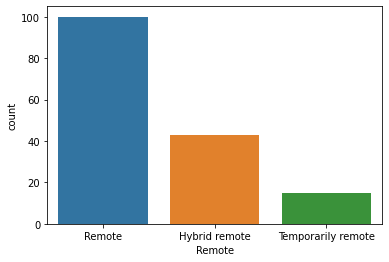

In [27]:
sns.countplot(x="Remote", data=df)

In [22]:
df.Description.str.len().head(30)  # Get the length of all comments

0      2386.0
1      3001.0
5      2376.0
6      3618.0
7      4461.0
8      1532.0
9      4604.0
14     3903.0
18     3717.0
20     4163.0
46     4407.0
81     6282.0
82     5425.0
83     4915.0
84     3782.0
92     5330.0
95     3050.0
100    7736.0
102    5084.0
108    2305.0
109    4849.0
124    8633.0
125    5367.0
126    1167.0
127    8709.0
131    3306.0
133    7269.0
135    5172.0
136    1163.0
137    9269.0
Name: Description, dtype: float64

In [23]:
print(df)

                                                  Title  \
0                                   Master Data Analyst   
1                         Business Intelligence Analyst   
5          Clinical Data Analyst - Blood Gas Specialist   
6                                        Senior Analyst   
7     Business Analyst - Data Specialist - Insurance...   
...                                                 ...   
1230                                Senior ITAM Analyst   
1231  Business Technology Analyst - OpenRoad Head Of...   
1232      Business Intelligence (BI) Developer- Analyst   
1233                                      Fleet Analyst   
1234                                  Logistics Analyst   

                          Company       Location  \
0                     Robert Half    Calgary, AB   
1        Vault Credit Corporation   Montréal, QC   
5                   Adecco Canada     Ottawa, ON   
6     School District #37 (Delta)      Delta, BC   
7                        Randst

In [24]:
df.to_csv("indeedjobs2022cleaned.csv", index = False)